# **Zomato Restaurants Analysis**
This project aims to understand customer preferences and restaurant trends to support key business decisions in the food industry. I analyze Zomato’s restaurant dataset using `Python` for data cleaning and exploratory data analysis (EDA), `SQL` for answering business queries, and `Power BI` for building an interactive dashboard that highlights meaningful insights.

## 1. Import Libraries

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sqlalchemy import create_engine
from dotenv import load_dotenv
import os

## 2. Load Dataset

In [2]:
df = pd.read_csv('../Data/Zomato-Restaurants-Dataset.csv')
df.head()

,Unnamed: 0,restaurant name,restaurant type,rate (out of 5),num of ratings,avg cost (two people),online_order,table booking,cuisines type,Unnamed: 9,area,local address
0,0,#FeelTheROLL,Quick Bites,3.4,7,200,No,No,Fast Food,0,Bellandur,Bellandur
1,1,#L-81 Cafe,Quick Bites,3.9,48,400,Yes,No,"Fast Food, Beverages",1,"Byresandra,Tavarekere,Madiwala",HSR
2,2,#refuel,Cafe,3.7,37,400,Yes,No,"Cafe, Beverages",2,Bannerghatta Road,Bannerghatta Road
3,3,'@ Biryani Central,Casual Dining,2.7,135,550,Yes,No,"Biryani, Mughlai, Chinese",3,Marathahalli,Marathahalli
4,4,'@ The Bbq,Casual Dining,2.8,40,700,Yes,No,"BBQ, Continental, North Indian, Chinese, Bever...",4,Bellandur,Bellandur


## 3. Data Cleaning

In [3]:
df.shape

(7105, 12)

In [4]:
df.columns

Index(['Unnamed: 0', 'restaurant name', 'restaurant type', 'rate (out of 5)',
       'num of ratings', 'avg cost (two people)', 'online_order',
       'table booking', 'cuisines type', 'Unnamed: 9', 'area',
       'local address'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7105 entries, 0 to 7104
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             7105 non-null   int64  
 1   restaurant name        7105 non-null   object 
 2   restaurant type        7105 non-null   object 
 3   rate (out of 5)        7105 non-null   float64
 4   num of ratings         7105 non-null   int64  
 5   avg cost (two people)  7105 non-null   int64  
 6   online_order           7105 non-null   object 
 7   table booking          7105 non-null   object 
 8   cuisines type          7105 non-null   object 
 9   Unnamed: 9             7105 non-null   int64  
 10  area                   7105 non-null   object 
 11  local address          7105 non-null   object 
dtypes: float64(1), int64(4), object(7)
memory usage: 666.2+ KB


In [6]:
df = df.drop(['Unnamed: 0','Unnamed: 9'],axis=1)

In [7]:
df.columns = df.columns.str.replace(' ','_').str.lower()

In [8]:
df = df.rename(columns={
    'rate_(out_of_5)':'rating',
    'avg_cost_(two_people)':'two_cost'
    })

In [9]:
df['restaurant_name'] = (
    df['restaurant_name']
    .astype(str)
    .str.replace(r"[^A-Za-z0-9\s]", " ", regex=True) 
    .str.replace(r"\s+", " ", regex=True)           
    .str.strip()                                     
    .str.title()                                     
)


In [10]:
df.isnull().sum()

restaurant_name    0
restaurant_type    0
rating             0
num_of_ratings     0
two_cost           0
online_order       0
table_booking      0
cuisines_type      0
area               0
local_address      0
dtype: int64

In [11]:
df.head()

,restaurant_name,restaurant_type,rating,num_of_ratings,two_cost,online_order,table_booking,cuisines_type,area,local_address
0,Feeltheroll,Quick Bites,3.4,7,200,No,No,Fast Food,Bellandur,Bellandur
1,L 81 Cafe,Quick Bites,3.9,48,400,Yes,No,"Fast Food, Beverages","Byresandra,Tavarekere,Madiwala",HSR
2,Refuel,Cafe,3.7,37,400,Yes,No,"Cafe, Beverages",Bannerghatta Road,Bannerghatta Road
3,Biryani Central,Casual Dining,2.7,135,550,Yes,No,"Biryani, Mughlai, Chinese",Marathahalli,Marathahalli
4,The Bbq,Casual Dining,2.8,40,700,Yes,No,"BBQ, Continental, North Indian, Chinese, Bever...",Bellandur,Bellandur


In [ ]:
df['rating'] = df['rating'].replace(0,np.nan).astype(float)

median_rating = df['rating'].median()

df['rating'].fillna(median_rating, inplace=True)

C:\Users\ankit\AppData\Local\Temp\ipykernel_1508\3893814846.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating'].fillna(median_rating, inplace=True)


In [34]:
df['two_cost'] = df['two_cost'].replace(0,np.nan).astype(float)
median_two_cost = df['two_cost'].median()

df['two_cost'].fillna(median_two_cost,inplace=True)

C:\Users\ankit\AppData\Local\Temp\ipykernel_1508\265494005.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['two_cost'].fillna(median_two_cost,inplace=True)


## 4. Exploratory Data Analysis


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7105 entries, 0 to 7104
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   restaurant_name  7105 non-null   object 
 1   restaurant_type  7105 non-null   object 
 2   rating           7105 non-null   float64
 3   num_of_ratings   7105 non-null   int64  
 4   two_cost         7105 non-null   float64
 5   online_order     7105 non-null   object 
 6   table_booking    7105 non-null   object 
 7   cuisines_type    7105 non-null   object 
 8   area             7105 non-null   object 
 9   local_address    7105 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 555.2+ KB


In [41]:
df.describe()

,rating,num_of_ratings,two_cost
count,7105.000000,7105.000000,7105.000000
mean,3.514117,188.921042,539.161013
std,0.461028,592.171049,461.211329
min,1.800000,1.000000,40.000000
25%,3.200000,16.000000,300.000000
50%,3.500000,40.000000,400.000000
75%,3.800000,128.000000,600.000000
max,4.900000,16345.000000,6000.000000



#### Shapiro Wilk Test
- H0 - The Rating is Normally Distributed. (Reject H0)
- H1 - The Rating is not Normally Distributed. (Fail to Reject H0)

In [53]:
stat, p = stats.shapiro(df['rating'])

if p > 0.05:
    print('Rating is normally Distributed. (Fail to Reject H0)')
else:
    print('Rating is not Normally Distributed. (Reject H0)')

Rating is not Normally Distributed. (Reject H0)


In [71]:
df['rating'].skew(), df['rating'].kurtosis()

(-0.06231606482215356, -0.516436061223835)

<Axes: ylabel='rating'>

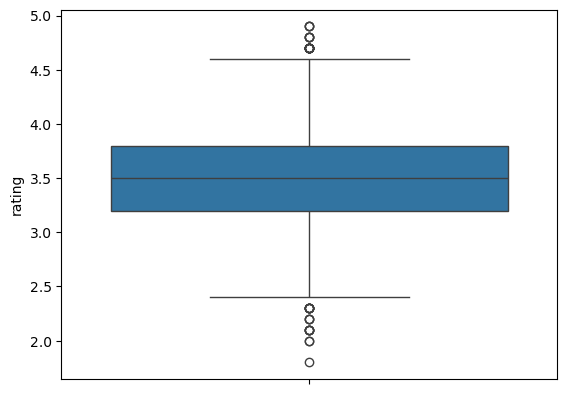

In [72]:
sns.boxplot(df['rating'])

<Axes: xlabel='rating', ylabel='Count'>

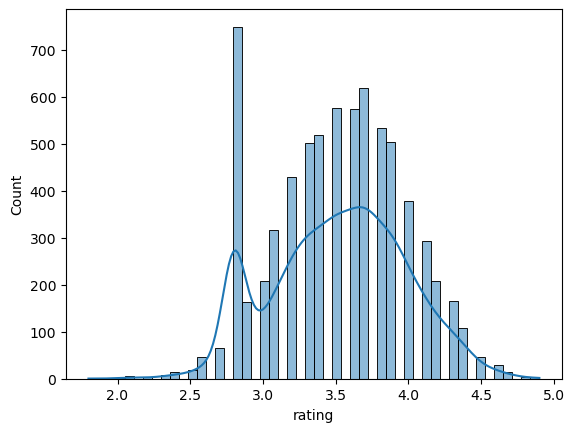

In [44]:
sns.histplot(data = df, x='rating',kde=True)

<Axes: xlabel='online_order', ylabel='rating'>

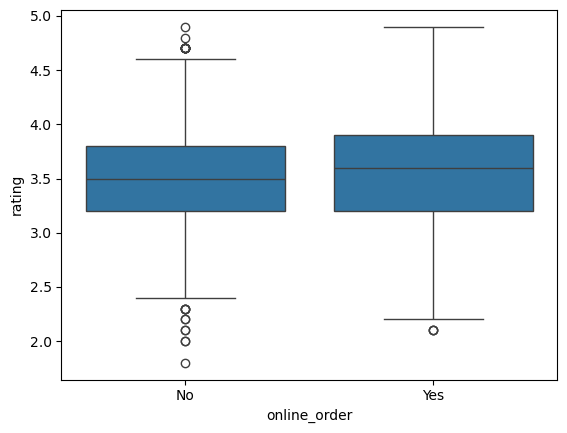

In [73]:
sns.boxplot(data=df, x='online_order', y='rating')


In [61]:
df.groupby('online_order')['restaurant_name'].count().reset_index().sort_values(by='restaurant_name',ascending=False)

,online_order,restaurant_name
1,Yes,3727
0,No,3378


In [62]:
df.groupby('table_booking')['restaurant_name'].count().reset_index().sort_values(by='restaurant_name',ascending=False)

,table_booking,restaurant_name
0,No,6361
1,Yes,744


In [76]:
pear, p = stats.spearmanr(df['rating'],df['two_cost'])

pear,p


(0.32008153104123066, 5.68135471133704e-169)

In [69]:
if p < 0.05:
    print('The relationship is statistically significant')
else:
    print('The relationship is not significant')

The relationship is statistically significant


<Axes: xlabel='num_of_ratings', ylabel='rating'>

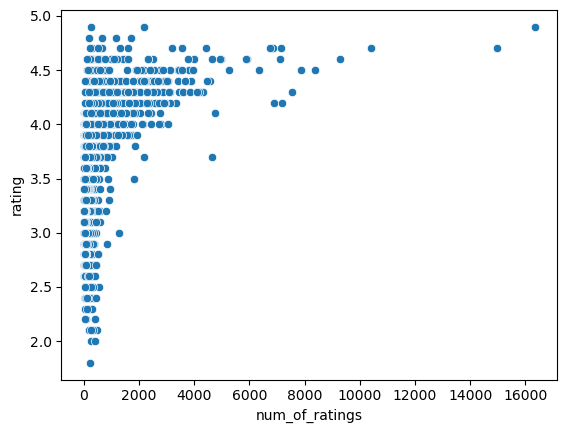

In [65]:
sns.scatterplot(data =  df, x = 'num_of_ratings',y = 'rating')

## 5. Export DataFrame to PostgreSQL

In [79]:
load_dotenv()
database = os.getenv('URL')

engine = create_engine(database)

In [80]:
df.to_sql('restaurants',engine,if_exists='replace',index=False)

105